In [51]:

import numpy as np
import pandas as pd
import os

#for plot
import seaborn as sns
import matplotlib.pyplot as plt

#for prepare data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


#metric
from sklearn.metrics import  accuracy_score

In [52]:
df =pd.read_csv(os.path.join(os.getcwd(),'train.csv'))

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# describe to num
df.describe()
#observation:
          # 1- average of ages less than 30
          # 2- 38% of all survived
          # 3- 50% of people in pclass 3
          # 4- 50% of people pay fare 14.5 or less

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
# describe to categ
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#remove unwanted columns
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


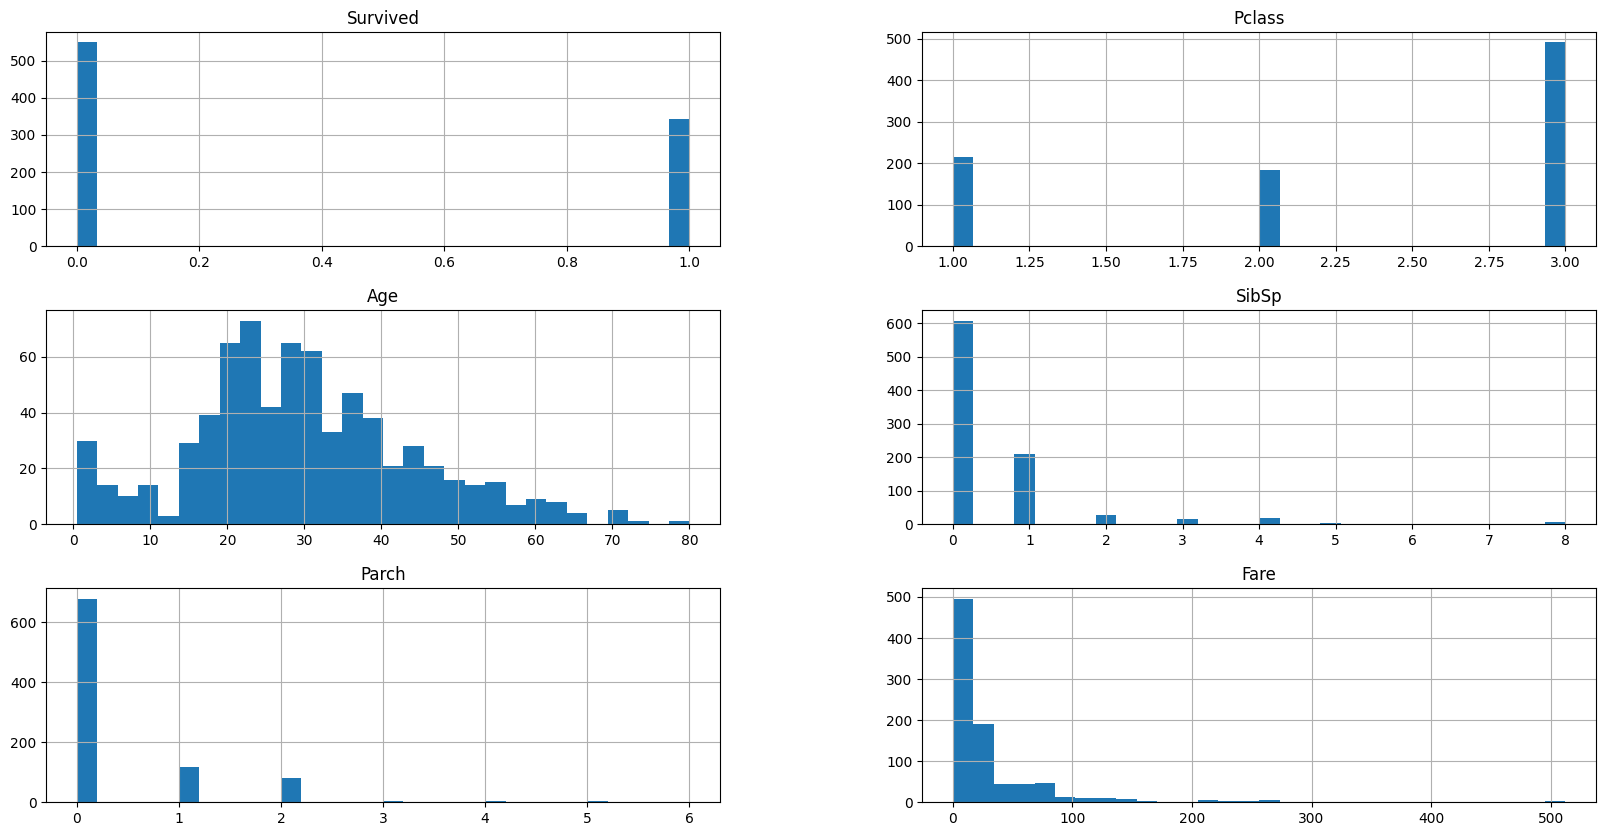

In [59]:
df.hist(bins=30,figsize=[20,10])
plt.show()

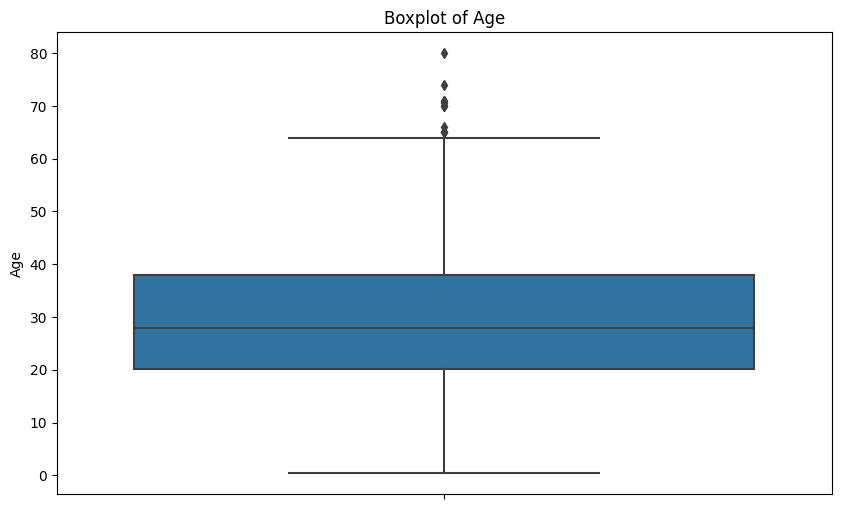

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Age',data=df)
plt.title(f'Boxplot of Age')
plt.show()
#we see have outlayer in age

In [61]:
#count of rows that make outlayer
len(df[df['Age'] > 65])

8

In [62]:
#test to remove the outlayer name it (ee)
ee=df[df['Age']<=65]
ee.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


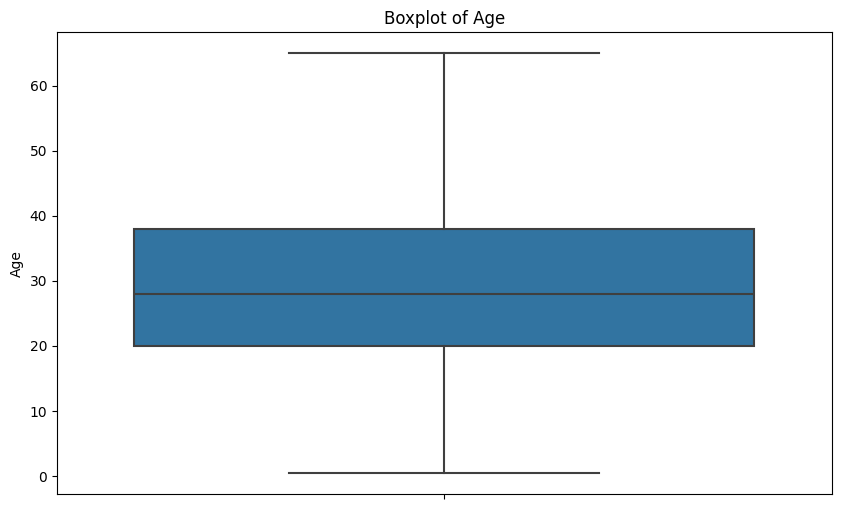

In [63]:
#plot to the ee without outlayer
plt.figure(figsize=(10, 6))
sns.boxplot(y='Age',data=ee)
plt.title(f'Boxplot of Age')
plt.show()
#bea. it only 8 so keep them

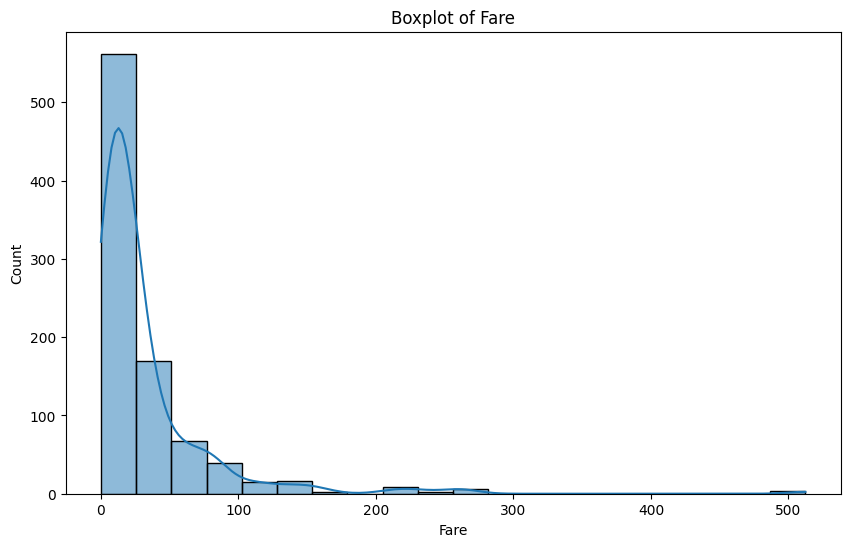

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare',data=df,bins=20,kde=True)
plt.title(f'Boxplot of Fare')
plt.show()

In [65]:
#to color visualization
color={0.0: 'red', 1.0: 'green'}

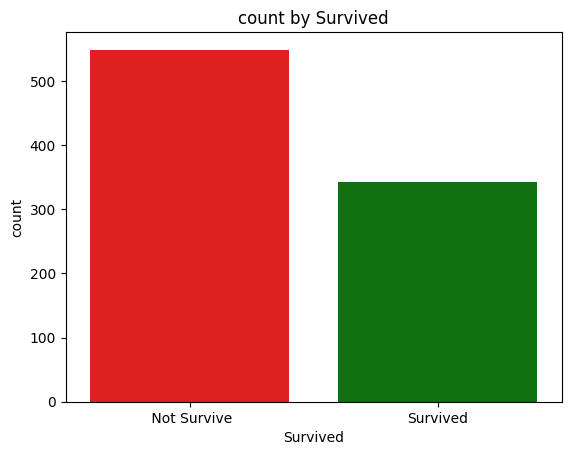

In [66]:
  #to color visualization

sns.countplot(x='Survived', data=df,palette=color)
plt.title('count by Survived')
plt.xticks(ticks=[0, 1], labels=[' Not Survive', 'Survived'])
plt.show()

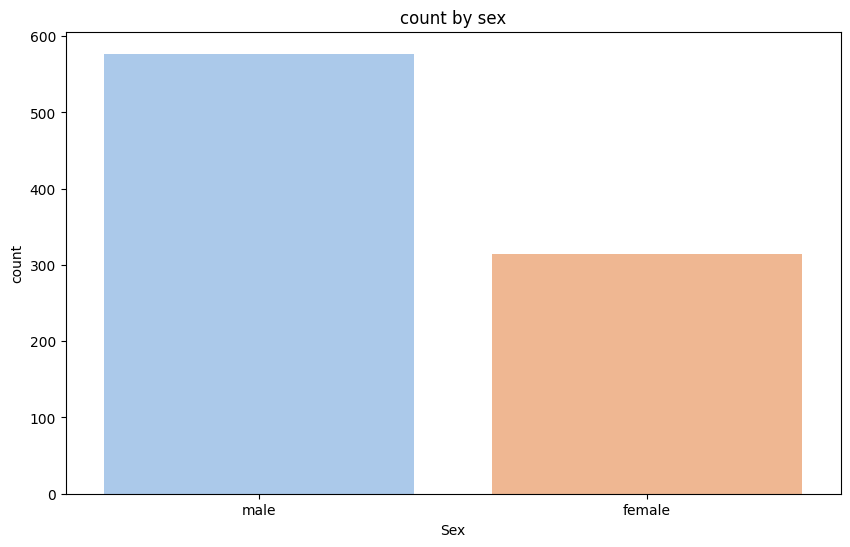

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex',data=df, palette='pastel')
plt.title(f'count by sex')
plt.show()

In [68]:
df[['Survived', 'Pclass']].groupby('Pclass').mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


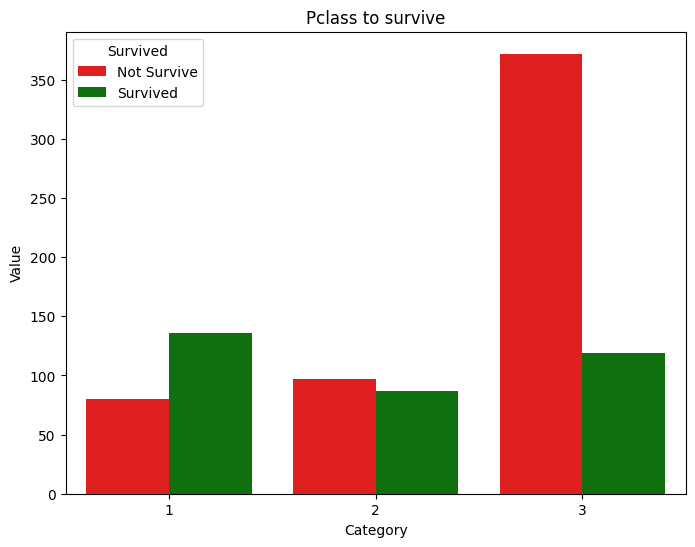

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, hue='Survived',palette=color)

# Adding titles and labels
plt.title('Pclass to survive')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend(title='Survived', labels=['Not Survive', 'Survived'])
plt.show()

In [70]:
df[['Sex', 'Pclass']].groupby('Sex').value_counts().reset_index().sort_values(by='Pclass')

,Sex,Pclass,count
1,female,1,94
4,male,1,122
2,female,2,76
5,male,2,108
0,female,3,144
3,male,3,347


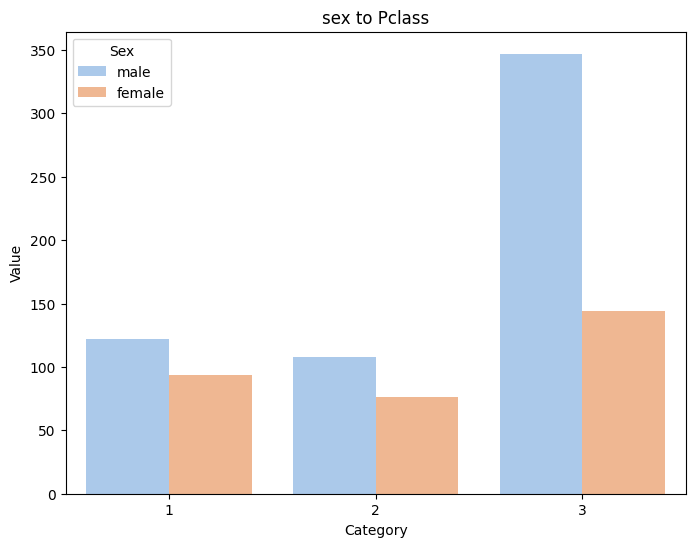

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(hue='Sex', data=df, x='Pclass',palette='pastel')

# Adding titles and labels
plt.title('sex to Pclass')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [72]:
df['Age'].mean(),df['Age'].median()

(29.69911764705882, 28.0)

In [73]:
#fillna
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [74]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [75]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [76]:
# we want to get family member
e=df['SibSp']+df['Parch']
e.value_counts().sort_index()

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64

In [77]:
def family_size(size):
    if size == 0:
        return 0
    elif size <= 3:
        return 1
    elif size <= 6:
        return 2
    else:
        return 3


df['family_size'] = df['SibSp'] + df['Parch']

df['family_size']=df['family_size'].apply(family_size)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


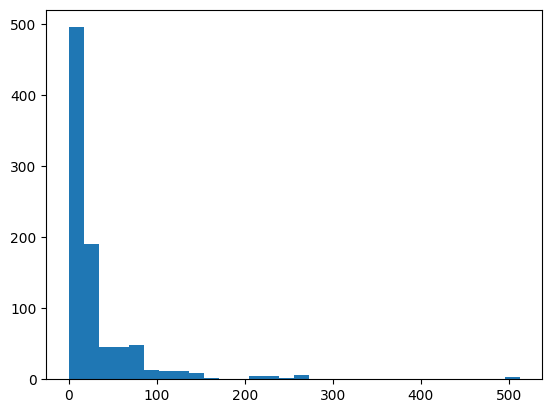

In [79]:
#right skew
plt.hist(x='Fare',data=df,bins=30)
plt.show()

In [80]:
df['Fare'].skew()

4.787316519674893

In [81]:
# make log to make it normal distrbution
# add 1 bea. has 0 values
df['Fare_new'] = np.log(df['Fare'] + 1)

In [82]:
df['Fare_new'].skew()

0.3949280095189306

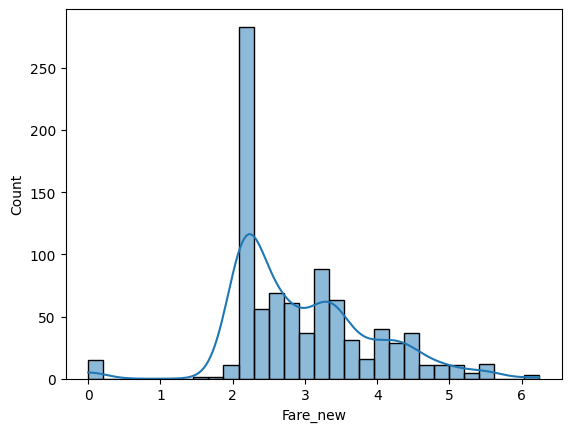

In [83]:
#right skew
sns.histplot(x='Fare_new',data=df,bins=30, kde=True)
plt.show()

In [84]:
df['Age']=df['Age'].round(1)

In [85]:
df.drop(['SibSp', 'Parch','Fare'],inplace=True,axis=1)

##`prepare data for moodel`

In [86]:
#split to num and categ
num_cols = df.drop(columns=['Survived']).select_dtypes(include=['number']).columns
categ_cols=df.select_dtypes(exclude=['number']).columns
num_cols,categ_cols

(Index(['Pclass', 'Age', 'family_size', 'Fare_new'], dtype='object'),
 Index(['Sex', 'Embarked'], dtype='object'))

In [87]:
#split data
y = df['Survived']
X=df.drop(['Survived'],axis=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scale numerical features
        ('cat', OrdinalEncoder(), categ_cols)   # One-hot encode categorical features
    ]
)

# Create the pipeline with preprocessing only
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the pipeline to transform the training data
X_train_full = pipeline.fit_transform(X_train)

# Optionally, apply the same transformation to the test data
X_test_full = pipeline.transform(X_test)

##`building models`

In [90]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [91]:
weight= {}

l=np.bincount(y)
for i in range(len(l)):
  weight[i]=l[i]/len(y)
weight

{0: 0.6161616161616161, 1: 0.3838383838383838}

In [92]:
# ... your existing code ...

def build_and_evaluate_model(model, model_name):
    """
    Trains a model, predicts on test data, and evaluates performance.
    """
    # Fit the model on the training data
    model.fit(X_train_full, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_full)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}")



models = {
    "Logistic Regression": LogisticRegression(class_weight=weight,random_state=44),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=12, random_state=45),
    "Random Forest :bagging ": RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=100,random_state=44),
    "Random Forest :pasting ": RandomForestClassifier(bootstrap=False, max_depth=8, n_estimators=100,random_state=44),
    "Support Vector Classifier": SVC(),
    "xgb boost":xgb.XGBClassifier(random_state=42,max_depth =5)
}

# Build and evaluate each model
for model_name, model in models.items():
    build_and_evaluate_model(model, model_name)

Logistic Regression: Accuracy = 0.8212
K-Nearest Neighbors: Accuracy = 0.8212
Decision Tree: Accuracy = 0.7933
Random Forest :bagging : Accuracy = 0.8324
Random Forest :pasting : Accuracy = 0.8268
Support Vector Classifier: Accuracy = 0.8101
xgb boost: Accuracy = 0.7989


##### `choose random forest bagging as best model to make prediction for new instance`

In [93]:
bagging_model = RandomForestClassifier(bootstrap=False, max_depth=8, n_estimators=100, random_state=44)
bagging_model.fit(X_train_full, y_train)

# Evaluate the model
y_pred = bagging_model.predict(X_test_full)
accuracy = accuracy_score(y_test, y_pred)
print(f"bagging Random Forest Accuracy: {accuracy:.4f}")

Pasting Random Forest Accuracy: 0.8268


In [94]:
def x_new(x):
    x = pd.DataFrame([x])
    
    x['Fare_new'] = np.log(x['Fare'] + 1)
    x['family_size'] = x['SibSp'] + x['Parch']
    x['family_size']=x['family_size'].apply(family_size)
    x.drop(['SibSp', 'Parch', 'Fare'], inplace=True, axis=1)
    
    # Use the preprocessing pipeline
    x_preprocessed = pipeline.transform(x)
    
    # Predict using the trained model
    prediction = bagging_model.predict(x_preprocessed)
    
    
    if prediction==0:
        
        return 'Not Survive'
    else:
        
        return 'survive'

In [97]:
new_instance = {
    'Pclass': 3,          # 1st class
    'Sex': 'female',      # 'female' instead of 1
    'Age': 29,            # Age of the passenger
    'SibSp': 0,           # No siblings or spouses aboard
    'Parch': 0,           # No parents or children aboard
    'Fare': 100,          # Fare price
    'Embarked': 'C'       # 'C' for Cherbourg instead of 0
}

predicted_class = x_new(new_instance)
print(f"Predicted Class: {predicted_class}")

Predicted Class: Not Survive
